In [1]:
# Packages to run the code

import sympy as sp

## Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from scipy.optimize import fsolve

from scipy.stats import binom

from scipy.integrate import quad

## Calculations
import numpy as np

from IPython.display import display
sp.init_printing()
%matplotlib notebook

In [2]:
def functie(x,c):
    return x**3+c-3/2*x**5

In [3]:
a = 50
d = 1 # radius
v = np.pi*d**2*a

N = np.logspace(-1,8,100)

c = 3*v*np.sqrt(N)/(4*a**3)

x = []

for i in range(len(c)):
    if i == 69 or 70:
        x.append(fsolve(functie,3, args = (c[i]))[0])
    elif i < 70:
        x.append(fsolve(functie,1, args = (c[i]))[0])    
    else:
        x.append(fsolve(functie,2, args = (c[i]))[0])

x = np.array(x)
R = a*np.sqrt(N)*x

<IPython.core.display.Javascript object>


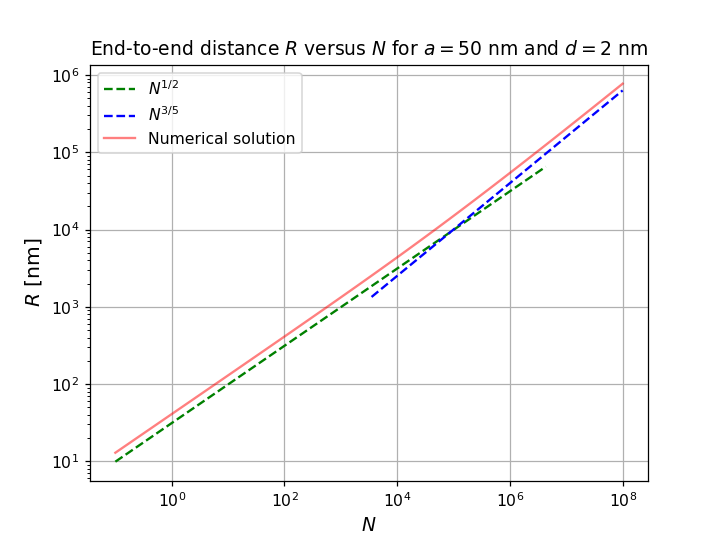

In [4]:
fig, ax = plt.subplots(1,1)

plt.loglog(N[0:85], a*np.sqrt(N[0:85])/1.6, color = 'green', label = r'$N^{1/2}$', linestyle = '--')
plt.loglog(N[50:100], a*N[50:100]**(3/5)/5, color = 'blue', label = r'$N^{3/5}$', linestyle = '--')
plt.loglog(N, R, color = 'red', label = 'Numerical solution', alpha = 0.5)

#plt.loglog(N, (np.sqrt(2/3)*a*np.sqrt(N)+9*v/(16*a**3)*N), color = 'green', label = 'small c', linestyle = '--')
#plt.loglog(N, (v/(2*a**3))**(1/5)*a*N**(3/5)+1/5*(2/3)**(4/5)*(4*a**3/(3*v))**(1/5)*a*N**(2/5), color = 'blue', label = 'large c', linestyle = '--', alpha = 0.5)
plt.grid()
plt.xlabel(r'$N$', size = 12)
plt.ylabel(r'$R$ [nm]', size = 13)
plt.title(r'End-to-end distance $R$ versus $N$ for $a = '+str(a)+ ' $ nm and $d = '+str(int(2*d))+ '$ nm')
plt.legend()


plt.show()

<IPython.core.display.Javascript object>


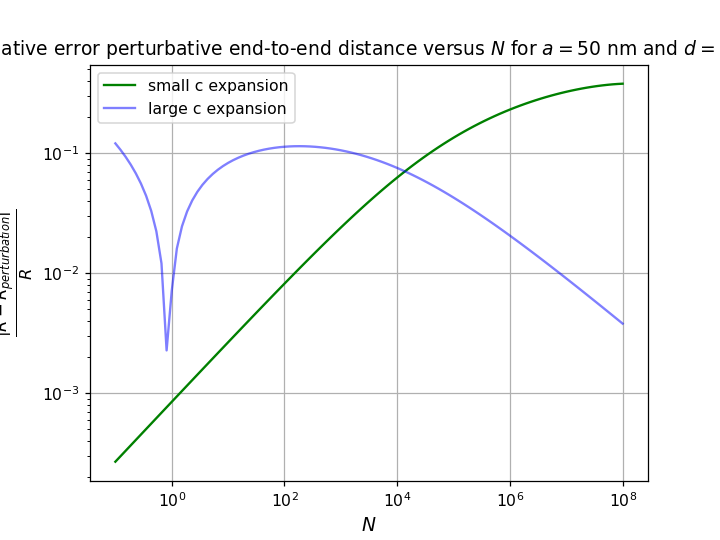

In [5]:
fig, ax = plt.subplots(1,1)

plt.loglog(N, abs(R-(np.sqrt(2/3)*a*np.sqrt(N)+9*v/(16*a**3)*N))/R, color = 'green', label = 'small c expansion', linestyle = '-')
plt.loglog(N, abs(R-(v/(2*a**3))**(1/5)*a*N**(3/5)-1/5*(2/3)**(4/5)*(4*a**3/(3*v))**(1/5)*a*N**(2/5))/R, color = 'blue', label = 'large c expansion', linestyle = '-', alpha = 0.5)
plt.grid()
plt.xlabel(r'$N$', size = 12)
plt.ylabel(r'$\frac{|R-R_{perturbation}|}{R}$', size = 15)
plt.title(r'Relative error perturbative end-to-end distance versus $N$ for $a = '+str(a)+ ' $ nm and $d = '+str(int(2*d))+ '$ nm')
plt.legend()


plt.show()